### 过拟合与欠拟合

In [1]:
import numpy as np
import matplotlib.pyplot as plt

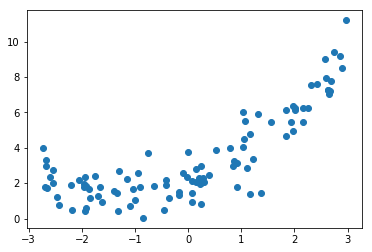

In [2]:
x = np.random.uniform(-3,3,size=100)
X = x.reshape(-1,1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0,1,size=100)
plt.scatter(x,y)
plt.show()

### 使用线性回归

In [3]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [4]:
# 使用均方误差进行模型评价
from sklearn.metrics import mean_squared_error
y_predict = lin_reg.predict(X)
mean_squared_error(y,y_predict)

2.2756168894280306

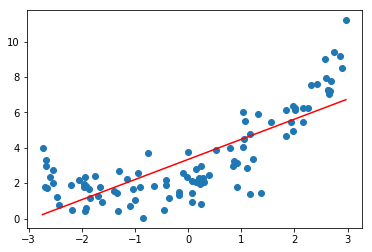

In [5]:
plt.scatter(x,y)
plt.plot(np.sort(x),y_predict[np.argsort(x)],color='r')
plt.show()
# 欠拟合

### 使用多项式回归

In [6]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

ploy_reg = Pipeline([
    ("poly",PolynomialFeatures(degree=2)),
    ("std_scaler",StandardScaler()),
    ("lin_reg",LinearRegression())
])

ploy_reg.fit(X,y)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lin_reg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [7]:
y2_predict = ploy_reg.predict(X)
mean_squared_error(y,y2_predict)

0.8605319079984588

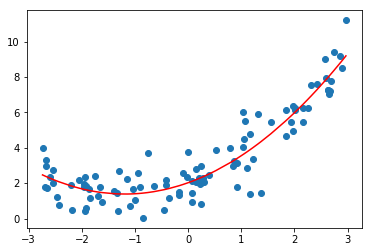

In [8]:
plt.scatter(x,y)
plt.plot(np.sort(x),y2_predict[np.argsort(x)],color='r')
plt.show()

In [9]:
ploy10_reg = Pipeline([
    ("poly",PolynomialFeatures(degree=10)),
    ("std_scaler",StandardScaler()),
    ("lin_reg",LinearRegression())
])

ploy10_reg.fit(X,y)
y10_predict = ploy10_reg.predict(X)
mean_squared_error(y,y10_predict)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=10, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lin_reg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

0.7778691799290952

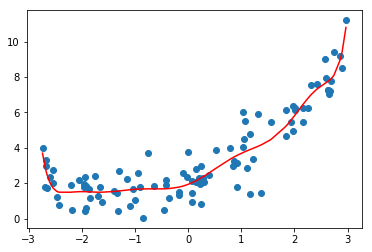

In [10]:
plt.scatter(x,y)
plt.plot(np.sort(x),y10_predict[np.argsort(x)],color='r')
plt.show()

In [11]:
ploy100_reg = Pipeline([
    ("poly",PolynomialFeatures(degree=100)),
    ("std_scaler",StandardScaler()),
    ("lin_reg",LinearRegression())
])

ploy100_reg.fit(X,y)
y100_predict = ploy100_reg.predict(X)
mean_squared_error(y,y100_predict)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=100, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lin_reg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

0.5987699975546534

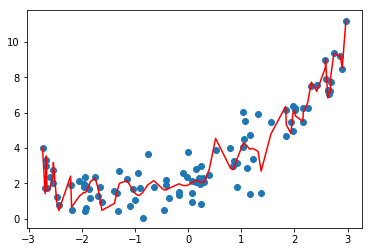

In [12]:
plt.scatter(x,y)
plt.plot(np.sort(x),y100_predict[np.argsort(x)],color='r')
plt.show()

# 过拟合

### train test split的意义 与 模型泛化

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=666)

In [14]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
y_predict = lin_reg.predict(X_test)
mean_squared_error(y_test,y_predict)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

2.0422730931744595

In [15]:
# 
ploy2_reg = Pipeline([
    ("poly",PolynomialFeatures(degree=2)),
    ("std_scaler",StandardScaler()),
    ("lin_reg",LinearRegression())
])
ploy2_reg.fit(X_train,y_train)
y2_predict = ploy2_reg.predict(X_test)
mean_squared_error(y_test,y2_predict)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lin_reg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

0.8665013113770067

In [16]:
ploy10_reg = Pipeline([
    ("poly",PolynomialFeatures(degree=10)),
    ("std_scaler",StandardScaler()),
    ("lin_reg",LinearRegression())
])
ploy10_reg.fit(X_train,y_train)
y10_predict = ploy10_reg.predict(X_test)
mean_squared_error(y_test,y10_predict)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=10, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lin_reg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

0.9439486583994423

<img src="../img/12.png" width="500" align="left"/>